-1.0827132505678423 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.082713250567842
-1.152760911191327 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1527609111913273
-0.8185785107311209 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8185785107311206


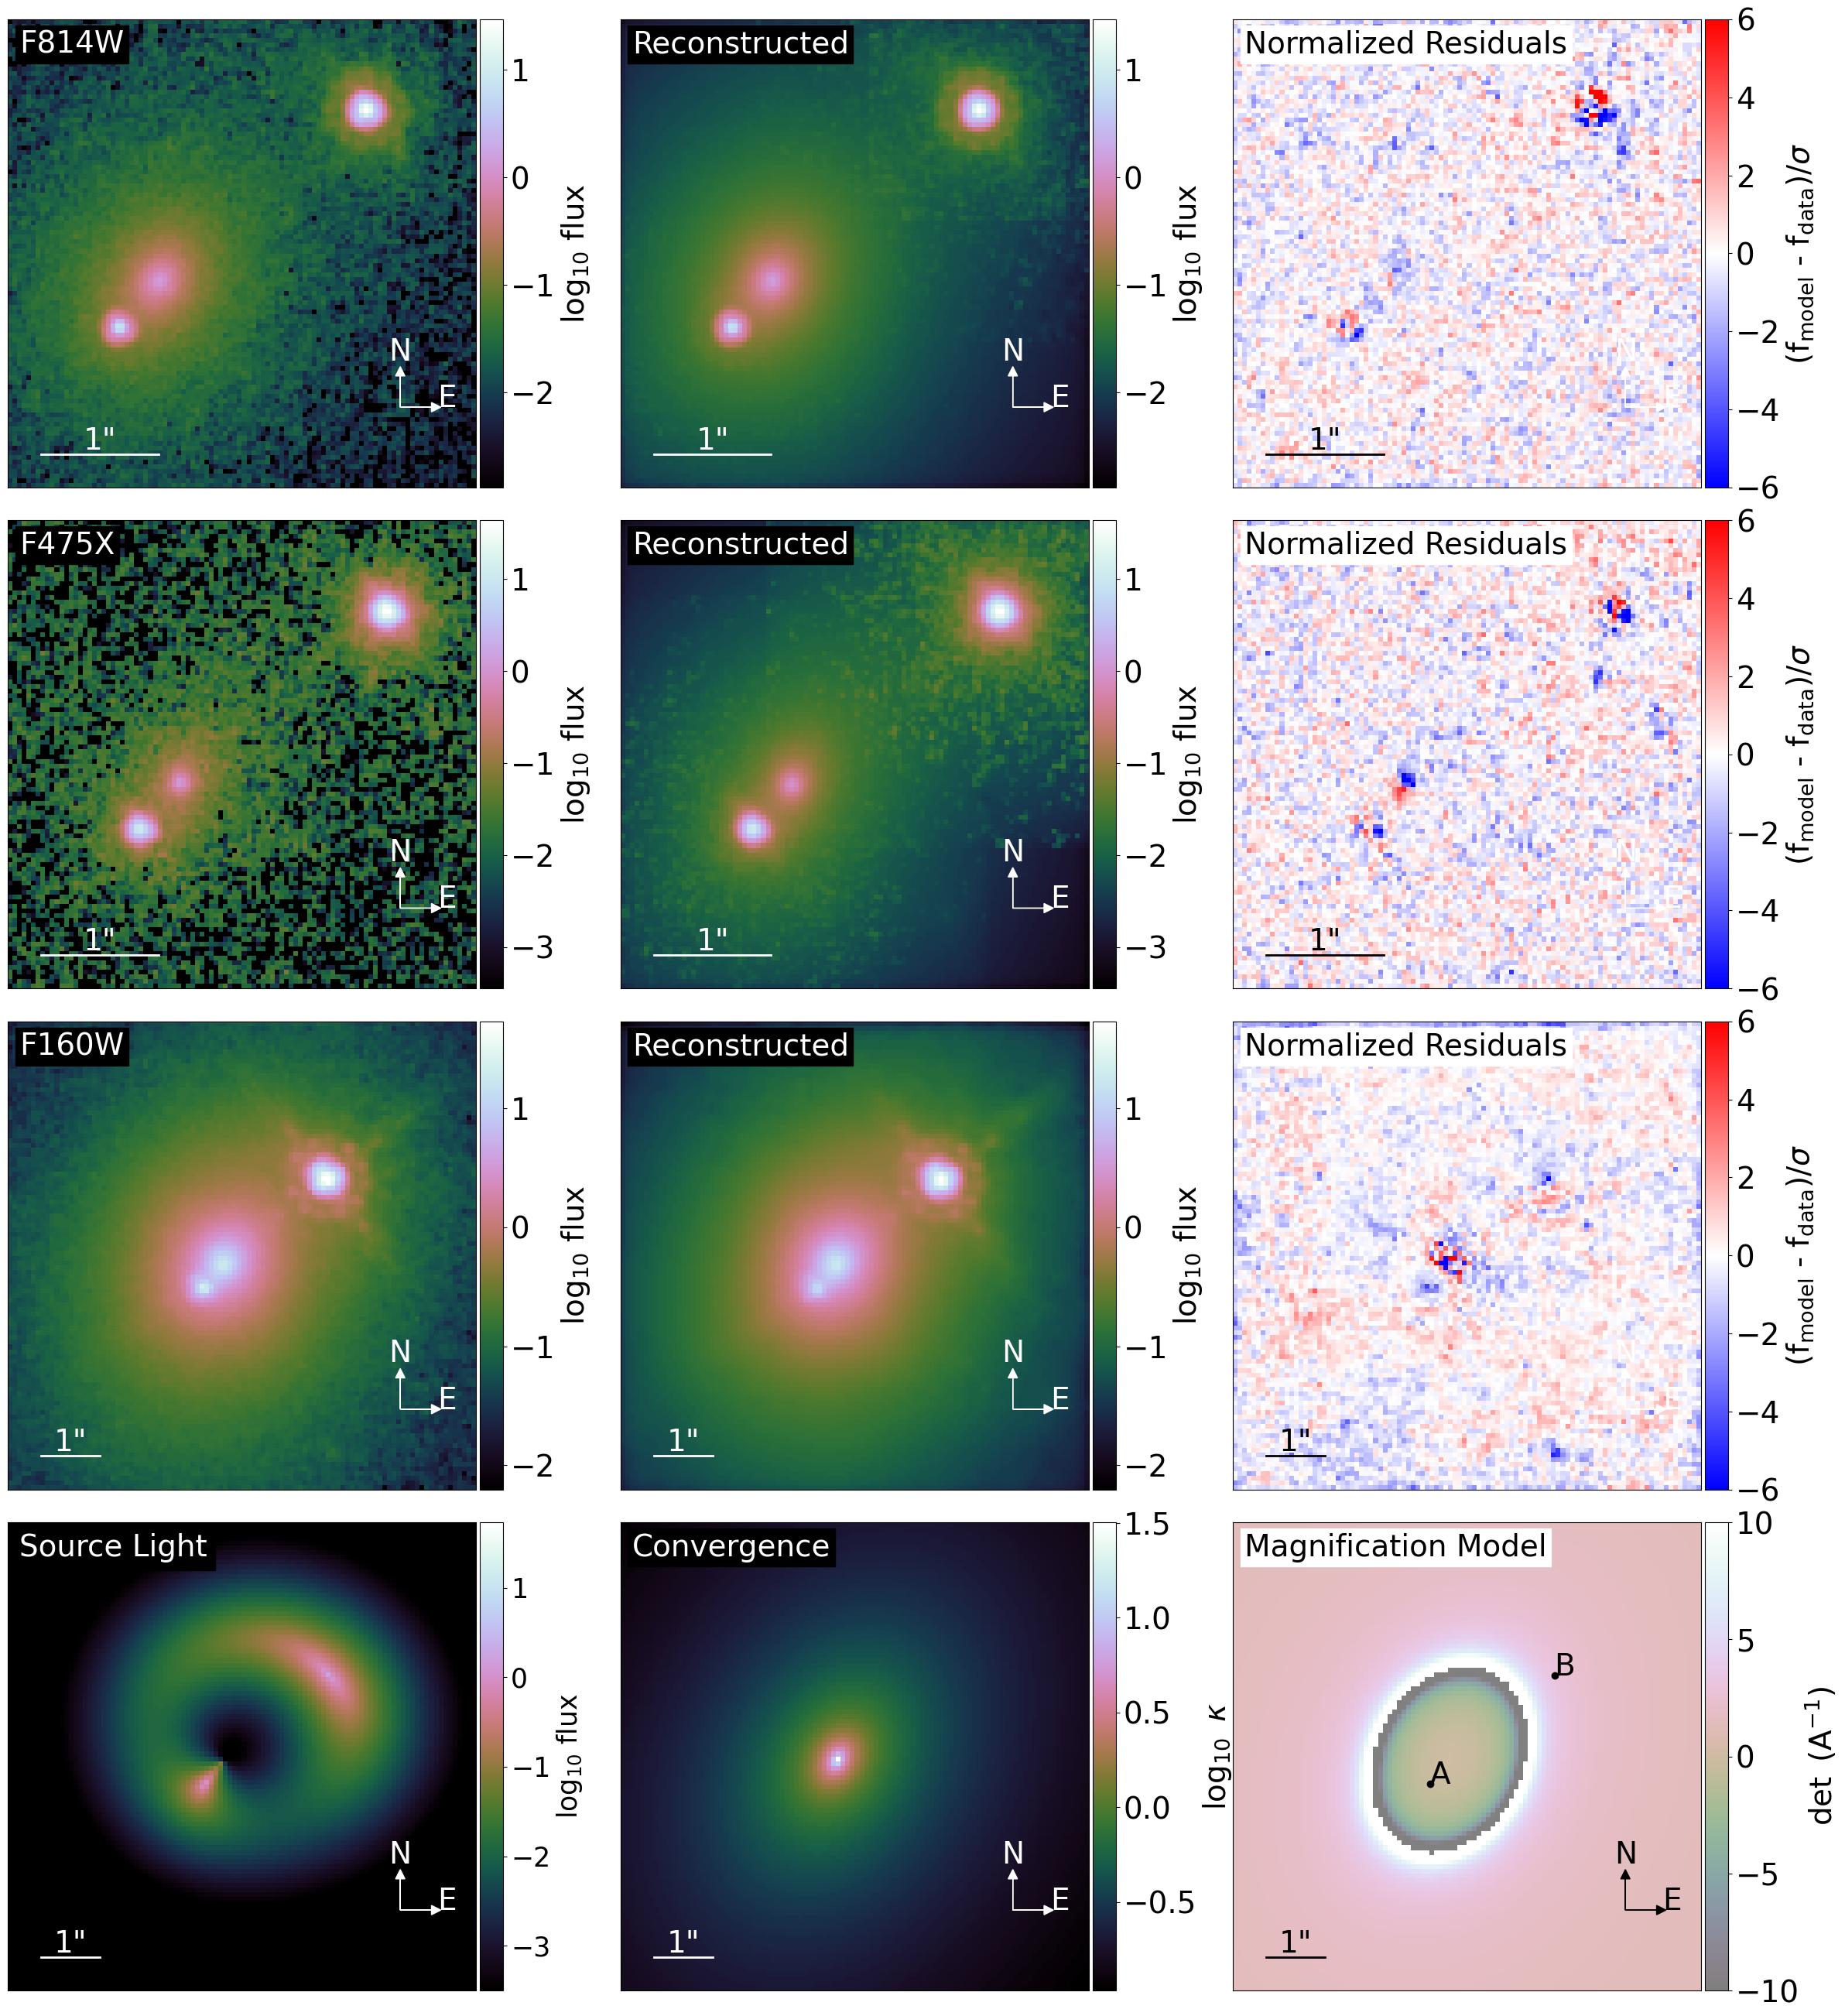

In [5]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system name
name = 'J1620+1203'
filters = ['F814W', 'F475X', 'F160W']
fontsize = 28

nrows = len(filters) + 1
fig, axes = plt.subplots(nrows, 3, figsize=(25, 26))

for i, filter in enumerate(filters):
    filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # initialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="cubehelix")

    # plot data image
    modelPlot.data_plot(ax=axes[i, 0],text=f'{filter}',font_size=fontsize)

    # plot model image
    modelPlot.model_plot(ax=axes[i, 1],font_size=fontsize)

    # plot residuals
    modelPlot.normalized_residual_plot(ax=axes[i, 2],v_min=-6,v_max=6,font_size=fontsize)

    if filter == 'F160W':
            modelPlot.decomposition_plot(
            ax=axes[i+1, 0], 
            text="Source Light", 
            font_size = 25,
            source_add=True, 
            unconvolved=True, 
            v_min=-3.5,
                )
            
            modelPlot.convergence_plot(ax=axes[i+1, 1], font_size = fontsize)

            modelPlot.magnification_plot(ax=axes[i+1, 2], text='Magnification Model', cmap='cubehelix', font_size = fontsize)
            

    # plot magnification model
    #modelPlot.magnification_plot(ax=axes[i, 3],text='Magnification Model', font_size=fontsize, cmap='PiYG')

    for sub_ax in axes[i+1, 0].figure.axes:
        for text in sub_ax.texts:
            text.set_fontsize(fontsize)

plt.tight_layout()
plt.subplots_adjust(wspace=0.00, hspace=0.07)
plt.show()